## Markov Chains
Markov Chains predict the next word based solely on the current word, forming a basic model for sequential data.
Limited in capturing complex dependencies, Markov Chains provide a foundation for understanding sequential prediction.

In [17]:
import random
from collections import defaultdict

# Sample data
text = "the cat sat on the mat the cat ate the rat"
words = text.split()

# Build transition map
transitions = defaultdict(list)
for i in range(len(words) - 1):
    transitions[words[i]].append(words[i + 1])

# Generate text based on Markov Chain
def generate_text(chain, start_word, num_words=10):
    word = start_word
    result = [word]
    for _ in range(num_words):
        # Check if the word exists in the chain
        if word not in chain or not chain[word]:
            break  # Stop if there are no words to transition to
        word = random.choice(chain[word])
        result.append(word)
    return ' '.join(result)

# Run and print the function 5 times
for _ in range(5):
    print(generate_text(transitions, "the"))


the cat ate the rat
the cat sat on the cat ate the cat sat on
the cat ate the cat ate the mat the mat the
the rat
the mat the cat sat on the rat


## Variational Autoencoders (VAEs)
Employ latent variable modeling [variables that cannot be directly observed or measured but influence the observable variables.<BR> For example, in psychology, latent variables might represent abstract concepts such as intelligence or motivation, which are inferred based on responses to a set of questions.]  for generating new data instances. <BR>They are effective for continuous data like images or audio but face challenges with text generation due to its discrete nature.

<BR>Latent Variable in image dataset:

- Observed Variables: The pixel values of images.
<BR>
- Latent Variables: A compressed, lower-dimensional representation of the image, such as the shape, color, and texture features.


Epoch 1, Loss: 302.8605032714844
Epoch 2, Loss: 213.86893722330728
Epoch 3, Loss: 202.48102080078124
Epoch 4, Loss: 196.92243755696614
Epoch 5, Loss: 193.11094370117186
Epoch 6, Loss: 189.98507468261718
Epoch 7, Loss: 187.39685600585938
Epoch 8, Loss: 185.43660211588542
Epoch 9, Loss: 184.0095556559245
Epoch 10, Loss: 182.96586179199218


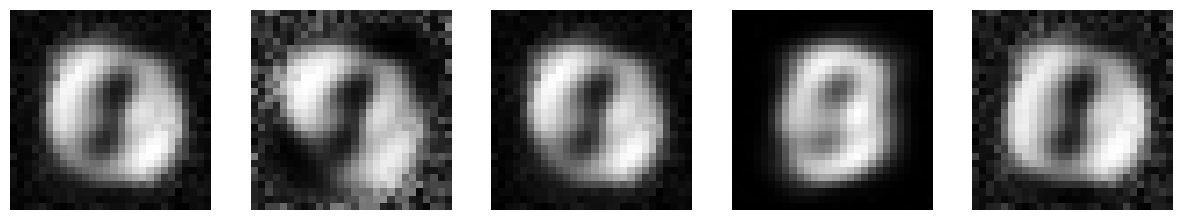

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

# Define VAE
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc_mu = nn.Linear(128, latent_dim)
        self.fc_logvar = nn.Linear(128, latent_dim)
        self.fc_decode = nn.Linear(latent_dim, input_dim)

    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        return self.fc_mu(h1), self.fc_logvar(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return torch.sigmoid(self.fc_decode(z))

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar


# Load MNIST dataset
transform = transforms.ToTensor()
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Instantiate VAE model
vae = VAE(input_dim=784, latent_dim=2)  # MNIST images are 28x28, flattened to 784
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# Loss function: reconstruction loss + KL divergence
def loss_function(reconstructed_x, x, mu, logvar):
    # Reconstruction loss (Binary Cross-Entropy)
    BCE = nn.functional.binary_cross_entropy(reconstructed_x, x.view(-1, 784), reduction='sum')
    
    # KL Divergence loss
    # KL = -0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    # where sigma^2 = exp(logvar)
    KL = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    
    return BCE + KL

# Training the VAE
epochs = 10
for epoch in range(epochs):
    vae.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.view(-1, 784)  # Flatten the image to 1D vector
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed_x, mu, logvar = vae(data)
        
        # Compute the loss
        loss = loss_function(reconstructed_x, data, mu, logvar)
        
        # Backpropagate
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
    print(f"Epoch {epoch + 1}, Loss: {train_loss / len(train_loader.dataset)}")

# Generate images after training
vae.eval()
num_samples = 5  # Number of random latent space samples to generate
latent_samples = torch.randn(num_samples, 2)  # Random latent variables (z)
generated_images = vae.decode(latent_samples).detach()

# Plot generated images
fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(generated_images[i].reshape(28, 28).cpu().numpy(), cmap='gray')
    ax.axis('off')
plt.show()


### Generative Adversarial Networks (GANs)
GANs consist of two competing networks—
<BR> -a generator and <BR> -a discriminator 
<BR>here the generator tries to produce realistic outputs and 
<BR>the discriminator learns to distinguish between real and generated data. 
#### <BR>GAN is powerful for image generation, GANs face challenges in NLP applications due to the discrete nature of text.

Epoch [1/3], Batch [1/938], D Loss: 1.4257, G Loss: 0.7210
Epoch [1/3], Batch [101/938], D Loss: 0.4625, G Loss: 2.2655
Epoch [1/3], Batch [201/938], D Loss: 0.2319, G Loss: 2.9155
Epoch [1/3], Batch [301/938], D Loss: 0.1543, G Loss: 3.3584
Epoch [1/3], Batch [401/938], D Loss: 0.0966, G Loss: 3.7445
Epoch [1/3], Batch [501/938], D Loss: 0.0703, G Loss: 3.9789
Epoch [1/3], Batch [601/938], D Loss: 0.0667, G Loss: 4.1712
Epoch [1/3], Batch [701/938], D Loss: 0.0512, G Loss: 4.3759
Epoch [1/3], Batch [801/938], D Loss: 0.0601, G Loss: 4.5155
Epoch [1/3], Batch [901/938], D Loss: 0.0425, G Loss: 4.7685
Epoch [2/3], Batch [1/938], D Loss: 0.0391, G Loss: 4.6698
Epoch [2/3], Batch [101/938], D Loss: 0.0391, G Loss: 5.0099
Epoch [2/3], Batch [201/938], D Loss: 0.0416, G Loss: 5.1115
Epoch [2/3], Batch [301/938], D Loss: 0.0268, G Loss: 5.2642
Epoch [2/3], Batch [401/938], D Loss: 0.0350, G Loss: 5.1762
Epoch [2/3], Batch [501/938], D Loss: 0.0370, G Loss: 5.3235
Epoch [2/3], Batch [601/938]

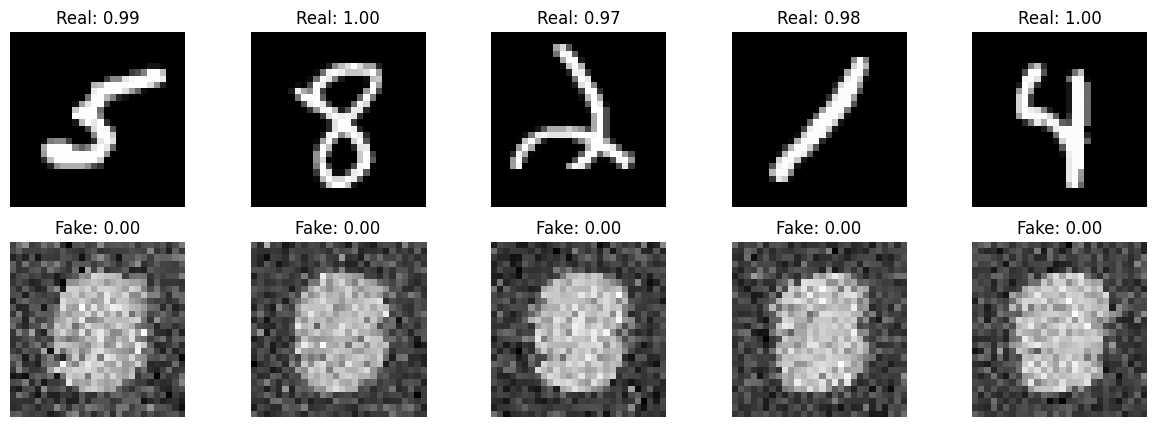

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Define the Generator Network
class Generator(nn.Module):
    def __init__(self, noise_dim, image_dim):
        super(Generator, self).__init__()
        self.fc = nn.Linear(noise_dim, image_dim)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))  # Output between [0, 1] like MNIST pixels

# Define the Discriminator Network
class Discriminator(nn.Module):
    def __init__(self, image_dim):
        super(Discriminator, self).__init__()
        self.fc = nn.Linear(image_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))  # Probability (real or fake)

# Load MNIST Dataset
transform = transforms.ToTensor()
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Initialize networks
noise_dim = 100  # Size of the noise vector
image_dim = 28 * 28  # Flattened MNIST images
generator = Generator(noise_dim, image_dim)
discriminator = Discriminator(image_dim)

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)

# Loss function
criterion = nn.BCELoss()

# Training the GAN
epochs = 3
for epoch in range(epochs):
    for batch_idx, (real_images, _) in enumerate(train_loader):
        real_images = real_images.view(-1, image_dim)
        real_labels = torch.ones(real_images.size(0), 1)  # Real labels (1)
        fake_labels = torch.zeros(real_images.size(0), 1)  # Fake labels (0)

        # Train Discriminator
        discriminator.zero_grad()
        
        # Real images loss
        real_output = discriminator(real_images)
        d_loss_real = criterion(real_output, real_labels)

        # Fake images loss
        noise = torch.randn(real_images.size(0), noise_dim)
        fake_images = generator(noise)
        fake_output = discriminator(fake_images.detach())  # Don't update generator
        d_loss_fake = criterion(fake_output, fake_labels)

        # Total discriminator loss
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        generator.zero_grad()
        output = discriminator(fake_images)  # Use "real" labels to fool discriminator
        g_loss = criterion(output, real_labels)

        g_loss.backward()
        optimizer_G.step()

        # Print loss every 100 batches
        if batch_idx % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Batch [{batch_idx+1}/{len(train_loader)}], '
                  f'D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}')

# Generate and Display Discriminator's Predictions
generator.eval()  # Set generator to evaluation mode
discriminator.eval()  # Set discriminator to evaluation mode

# Generate a batch of fake images
num_samples = 5
noise = torch.randn(num_samples, noise_dim)
fake_images = generator(noise)

# Get Discriminator's predictions on real and fake images
real_batch = next(iter(train_loader))[0].view(-1, image_dim)[:num_samples]  # Take a few real images
real_predictions = discriminator(real_batch)
fake_predictions = discriminator(fake_images)

# Display the images and their predicted labels
fig, axes = plt.subplots(2, num_samples, figsize=(15, 5))
for i in range(num_samples):
    # Display real images and their discriminator prediction
    axes[0, i].imshow(real_batch[i].view(28, 28).detach().cpu().numpy(), cmap='gray')
    axes[0, i].set_title(f"Real: {real_predictions[i].item():.2f}")
    axes[0, i].axis('off')
    
    # Display fake images and their discriminator prediction
    axes[1, i].imshow(fake_images[i].view(28, 28).detach().cpu().numpy(), cmap='gray')
    axes[1, i].set_title(f"Fake: {fake_predictions[i].item():.2f}")
    axes[1, i].axis('off')

plt.show()


## Autoregressive Language Model (GPT’s Generative Foundation)
Autoregressive models predict each word in a sequence by conditioning on all prior words, making them highly effective for language generation tasks. <BR> GPT leverages an autoregressive approach, processing each word sequentially to predict the next. <BR>In contrast to GANs and VAEs, autoregressive models are ideal for text generation as they generate each token based on context established by previous tokens.
<BR>In the GPT model, a Transformer architecture replaces the RNN, improving the model’s ability to handle long-range dependencies and enabling more complex NLP tasks.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Sample text data
text = "Once upon a time in a land far, far away, there was a magical kingdom."
chars = sorted(set(text))  # Unique characters in the text
char_to_idx = {ch: i for i, ch in enumerate(chars)}
idx_to_char = {i: ch for i, ch in enumerate(chars)}

# Encode text as integer sequence
encoded_text = [char_to_idx[c] for c in text]

# Hyperparameters
input_size = len(chars)       # Number of unique characters
hidden_size = 128             # Size of the LSTM's hidden layer
num_layers = 1                # Number of LSTM layers
seq_length = 25               # Length of input sequence
learning_rate = 0.01
num_epochs = 100

# Dataset and DataLoader
class TextDataset(Dataset):
    def __init__(self, encoded_text, seq_length):
        self.data = encoded_text
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        return (
            torch.tensor(self.data[idx: idx + self.seq_length], dtype=torch.long),
            torch.tensor(self.data[idx + 1: idx + self.seq_length + 1], dtype=torch.long),
        )

dataset = TextDataset(encoded_text, seq_length)
data_loader = DataLoader(dataset, batch_size=1, shuffle=True)

# Define the Autoregressive LSTM model
class AutoregressiveLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(AutoregressiveLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, input_size)

    def forward(self, x, hidden):
        x = self.embedding(x)
        out, hidden = self.lstm(x, hidden)
        out = self.fc(out)
        return out, hidden

    def init_hidden(self):
        return (torch.zeros(self.num_layers, 1, self.hidden_size),
                torch.zeros(self.num_layers, 1, self.hidden_size))

# Initialize the model, loss, and optimizer
model = AutoregressiveLSTM(input_size, hidden_size, num_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(num_epochs):
    hidden = model.init_hidden()
    for batch_idx, (inputs, targets) in enumerate(data_loader):
        outputs, hidden = model(inputs, hidden)
        hidden = tuple([h.detach() for h in hidden])  # Detach hidden states to prevent backprop through entire history
        loss = criterion(outputs.view(-1, input_size), targets.view(-1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Generate text using the trained model
def generate_text(model, start_str="Once ", gen_length=100):
    model.eval()
    generated_text = start_str
    input_seq = torch.tensor([char_to_idx[c] for c in start_str], dtype=torch.long).unsqueeze(0)
    hidden = model.init_hidden()

    for _ in range(gen_length):
        with torch.no_grad():
            output, hidden = model(input_seq, hidden)
            next_char_idx = torch.argmax(output[0, -1, :]).item()
            generated_char = idx_to_char[next_char_idx]
            generated_text += generated_char
            input_seq = torch.cat([input_seq, torch.tensor([[next_char_idx]])], dim=1)[:, 1:]

    return generated_text

# Generate and print text
print("Generated Text:")
print(generate_text(model, start_str="Once ", gen_length=100))


Epoch [10/100], Loss: 0.1651
Epoch [20/100], Loss: 0.0236
Epoch [30/100], Loss: 0.1063
Epoch [40/100], Loss: 0.0090
Epoch [50/100], Loss: 0.4012
Epoch [60/100], Loss: 0.0645
Epoch [70/100], Loss: 0.4559
Epoch [80/100], Loss: 0.1240
Epoch [90/100], Loss: 0.0057
Epoch [100/100], Loss: 0.0087
Generated Text:
Once upon a time in a land far, far away, there was a magical kingdom.e in a land far, far away, there wa


This code demonstrates a character-level autoregressive language model that predicts each character in a sequence based on its prior context, illustrating the core principles of autoregressive text generation.